In [1]:
import numpy as np
import matplotlib.pyplot as plt

# inmport vida plotting function
import sys
# caution: path[0] is reserved for script path (or '' in REPL)
sys.path.insert(1, '/Users/chenwei/Desktop/Github/ViDa/code')
from vida.plotfunc.interplot_vida import *


In [2]:
"""load saved trajectories data for npz file
"""
def loadhelixdata(SEQ):
    # multiple trajectories
    path = "/Users/chenwei/Desktop/Github/ViDa/code/data/vida_data/helix_assoc"
    if SEQ in ["PT3", "PT4", "PT3_hairpin"]:
        fnpz_data = "{}/helix_assoc_{}_multrj_100epoch_py.npz".format(path,SEQ)
    elif SEQ in ["PT0", "PT4_hairpin"]:
        fnpz_data = "{}/helix_assoc_{}_multrj_60epoch_py.npz".format(path,SEQ)

    data_npz = np.load(fnpz_data)

    # asssign data to variables
    for var in data_npz.files:
        globals()[var] = data_npz[var]

    # recover full data based on coord_id, indices, and unique data
    global SIMS_adj, SIMS_scar, SIMS_G, SIMS_pair
    SIMS_adj = SIMS_adj_uniq[coord_id_S]
    SIMS_scar = SIMS_scar_uniq[coord_id_S]
    SIMS_G = SIMS_G_uniq[coord_id_S]
    SIMS_pair = SIMS_pair_uniq[coord_id_S]

    global correct_interpair, intrapair_top, intrapair_bot, all_interpair
    global correct_interpair_uniq, intrapair_top_uniq, intrapair_bot_uniq, all_interpair_uniq
    correct_interpair_uniq, intrapair_top_uniq, intrapair_bot_uniq, all_interpair_uniq = hover_addon(SIMS_adj_uniq,SIMS_dict_uniq)
    correct_interpair = correct_interpair_uniq[coord_id_S]
    intrapair_top = intrapair_top_uniq[coord_id_S]
    intrapair_bot = intrapair_bot_uniq[coord_id_S]
    all_interpair = all_interpair_uniq[coord_id_S]
    
    global not_infinalstructure
    not_infinalstructure = (all_interpair-correct_interpair) + (intrapair_top+intrapair_bot)
    
    print(SIMS_T.shape,SIMS_HT.shape,SIMS_HT_uniq.shape)
    print(SIMS_adj.shape,SIMS_scar.shape,SIMS_G.shape,SIMS_HT.shape,SIMS_pair.shape)
    print(SIMS_adj_uniq.shape,SIMS_scar_uniq.shape,SIMS_G_uniq.shape,SIMS_pair_uniq.shape) 
    print(SIMS_dict.shape,SIMS_dict_uniq.shape)
    print(coord_id_S.shape,indices_S.shape,trj_id.shape,data_embed.shape,occ_density_S.shape)
    print(pca_coords.shape,pca_all_coords.shape)
    print(phate_coords.shape,phate_all_coords.shape)
    print(umap_coord_2d.shape,umap_all_coord_2d.shape,umap_coord_3d.shape,umap_all_coord_3d.shape)
    print(tsne_coord_2d.shape,tsne_all_coord_2d.shape,tsne_coord_3d.shape,tsne_all_coord_3d.shape)
    print(correct_interpair_uniq.shape, intrapair_top_uniq.shape, intrapair_bot_uniq.shape, all_interpair_uniq.shape)
    print(correct_interpair.shape, intrapair_top.shape, intrapair_bot.shape, all_interpair.shape)
    
    
    """make pd dataframe for plotting
    """
    global df, dfall, df0, df1, dfall0, dfall1
    df = pd.DataFrame(data={
            "Energy": SIMS_G_uniq, "Occp": occ_density_S, "Pair": SIMS_pair_uniq, "DP": SIMS_dict_uniq[:,0],"HT": SIMS_HT_uniq,
            "correct_interpair": correct_interpair_uniq, "intrapair_top": intrapair_top_uniq, "intrapair_bot": intrapair_bot_uniq, "all_interpair": all_interpair_uniq,
            "PCA 1": pca_coords[:,0], "PCA 2": pca_coords[:,1],
            "PCA X": pca_coords[:,0], "PCA Y": pca_coords[:,1], "PCA Z": pca_coords[:,2],
            "PHATE 1": phate_coords[:,0], "PHATE 2": phate_coords[:,1],
            "t-SNE 1": tsne_coord_2d[:,0],"t-SNE 2": tsne_coord_2d[:,1],
            "t-SNE X": tsne_coord_3d[:,0],"t-SNE Y": tsne_coord_3d[:,1],"t-SNE Z": tsne_coord_3d[:,2],
            "UMAP 1": umap_coord_2d[:,0],"UMAP 2": umap_coord_2d[:,1],
            "UMAP X": umap_coord_3d[:,0],"UMAP Y": umap_coord_3d[:,1],"UMAP Z": umap_coord_3d[:,2],
            }
            )

    # make dataframe for plotting   
    dfall = pd.DataFrame(data={
            "Energy": SIMS_G, "Pair": SIMS_pair,"DP": SIMS_dict[:,0],"HT": SIMS_HT, "TotalT": SIMS_T,
            "correct_interpair": correct_interpair, "intrapair_top": intrapair_top, "intrapair_bot":intrapair_bot, "all_interpair": all_interpair,
            "PCA 1": pca_all_coords[:,0], "PCA 2": pca_all_coords[:,1],
            "PCA X": pca_all_coords[:,0], "PCA Y": pca_all_coords[:,1], "PCA Z": pca_all_coords[:,2],
            "PHATE 1": phate_all_coords[:,0], "PHATE 2": phate_all_coords[:,1],
            "t-SNE 1": tsne_all_coord_2d[:,0],"t-SNE 2": tsne_all_coord_2d[:,1],
            "t-SNE X": tsne_all_coord_3d[:,0],"t-SNE Y": tsne_all_coord_3d[:,1],"t-SNE Z": tsne_all_coord_3d[:,2],
            "UMAP 1": umap_all_coord_2d[:,0],"UMAP 2": umap_all_coord_2d[:,1],
            "UMAP X": umap_all_coord_3d[:,0],"UMAP Y": umap_all_coord_3d[:,1],"UMAP Z": umap_all_coord_3d[:,2],
            }
            )


    df0 = df[df["Pair"] == 0]
    df1 = df[df["Pair"] == 1]

    dfall0 = dfall[dfall["Pair"] == 0]
    dfall1 = dfall[dfall["Pair"] == 1]
    
    return

In [3]:
seq = "PT4"
loadhelixdata(seq)
n_trace = 3
vis = "PCA"
fig = interactive_plotly_2D(seq,n_trace,df,dfall,trj_id,vis)
# pio.write_html(fig, file="{}_{}_2D.html".format(seq,vis), auto_open=True)
# fig.show()

(621984,) (621984,) (46606,)
(621984, 50, 50) (621984, 4000) (621984,) (621984,) (621984,)
(46606, 50, 50) (46606, 4000) (46606,) (46606,)
(621984, 5) (46606, 4)
(621984,) (46606,) (100,) (46606, 25) (46606,)
(46606, 3) (621984, 3)
(46606, 2) (621984, 2)
(46606, 2) (621984, 2) (46606, 3) (621984, 3)
(46606, 2) (621984, 2) (46606, 3) (621984, 3)
(46606,) (46606,) (46606,) (46606,)
(621984,) (621984,) (621984,) (621984,)


## Kmeans

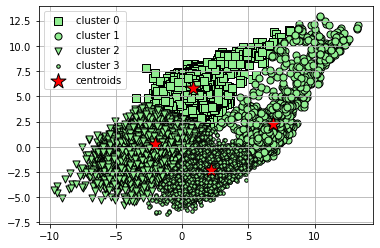

In [4]:
from sklearn.cluster import KMeans

points = pca_coords[:,:2]

km = KMeans(
    n_clusters=4, init='random',
    n_init=10, max_iter=500, 
    tol=1e-04, random_state=0
)
y_km = km.fit_predict(points)


plt.scatter(
    points[y_km == 0, 0], points[y_km == 0, 1],
    s=50, c='lightgreen',
    marker='s', edgecolor='black',
    label='cluster 0'
)

plt.scatter(
    points[y_km == 1, 0], points[y_km == 1, 1],
    s=50, c='lightgreen',
    marker='o', edgecolor='black',
    label='cluster 1'
)

plt.scatter(
    points[y_km == 2, 0], points[y_km == 2, 1],
    s=50, c='lightgreen',
    marker='v', edgecolor='black',
    label='cluster 2'
)

plt.scatter(
    points[y_km == 3, 0], points[y_km == 3, 1],
    s=50, c='lightgreen',
    marker='.', edgecolor='black',
    label='cluster 3'
)


# plot the centroids
plt.scatter(
    km.cluster_centers_[:, 0], km.cluster_centers_[:, 1],
    s=250, marker='*',
    c='red', edgecolor='black',
    label='centroids'
)
plt.legend(scatterpoints=1)
plt.grid()
plt.show()


In [5]:
km.cluster_centers_

array([[ 0.811293  ,  5.83713051],
       [ 6.88577631,  2.30110835],
       [-2.0469166 ,  0.28187177],
       [ 2.17470172, -2.34762154]])

In [6]:
y_km.shape

(46606,)

## Voronoi_diagram


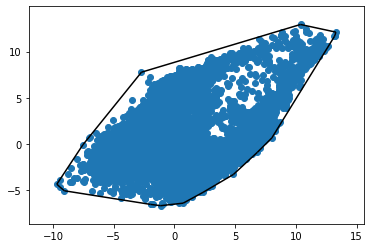

In [7]:
from scipy.spatial import ConvexHull, convex_hull_plot_2d
from scipy.spatial import Voronoi, voronoi_plot_2d

hull = ConvexHull(points)
_ = convex_hull_plot_2d(hull)
plt.show()

In [8]:
hull.vertices

array([39719, 22692,  7835,  7837, 15452, 10138, 19971, 17896, 29072,
       11060,  5027,   289,   288,   290, 15131, 19245], dtype=int32)

In [9]:
points[hull.vertices]

array([[-7.53351404, -0.0688974 ],
       [-9.6809369 , -4.33338548],
       [-9.43592429, -4.63215405],
       [-9.05507116, -5.04730931],
       [-1.96395226, -6.51942042],
       [-1.1250012 , -6.65819671],
       [ 0.72134431, -6.38457012],
       [ 2.35332975, -5.22029842],
       [ 4.85426156, -3.28636396],
       [ 6.83095205, -0.88667845],
       [ 8.02145102,  0.66646714],
       [13.1880273 , 11.66413198],
       [13.22873334, 11.78936323],
       [13.2945021 , 12.10856122],
       [10.3846471 , 12.93480225],
       [-2.71262838,  7.77459576]])

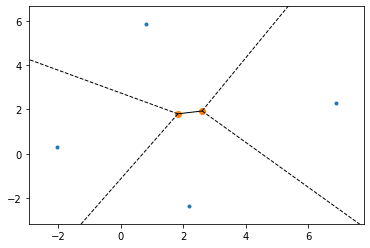

In [10]:
ppoint = hull.vertices
vor = Voronoi(km.cluster_centers_)
fig = voronoi_plot_2d(vor)

plt.show()

In [11]:
vor.ridge_vertices

[[0, 1], [-1, 0], [-1, 1], [-1, 0], [-1, 1]]

In [12]:
vor.regions

[[-1, 1, 0], [1, -1, 0], [-1, 0], [-1, 1], []]

In [14]:
vor.vertices

array([[1.82882116, 1.80069572],
       [2.60314502, 1.9296819 ]])

In [15]:
import json

# load old generated data
listObj = []
with open('../data/PT4_dna.json') as f:
    listObj = json.load(f)

# with open('PT4_idxtime.json', 'w') as f:
#     json.dump(IDX_TIME, f)


In [38]:
listObj[0]

{'ID': 0,
 'DP': '.........................+.........................',
 'PCA_X': -3.8436,
 'PCA_Y': -0.6501,
 'PHATE_X': 0.00533,
 'PHATE_Y': -0.00859,
 'Energy': 0.0,
 'Avgtime': 6.15e-10}

In [77]:
# append labels of each state to the json file
for i in range(len(listObj)):
    listObj[i]['intrapair_top'] = np.int32(intrapair_top_uniq[i])
    listObj[i]['intrapair_bot'] = np.int32(intrapair_bot_uniq[i])
    listObj[i]['correct_interpair'] = np.int32(correct_interpair[i])
    listObj[i]['total_interpair'] = np.int32(all_interpair_uniq[i])
    listObj[i]['binding'] = np.int32(SIMS_pair_uniq[i])
    listObj[i]['label'] = np.int32(y_km[i])

In [78]:
listObj[100]

{'ID': 100,
 'DP': '.((......)).....(........+.).....((((..(.....).))))',
 'PCA_X': -1.5936,
 'PCA_Y': 0.1699,
 'PHATE_X': 0.00257,
 'PHATE_Y': -0.01248,
 'Energy': -0.989,
 'Avgtime': 7.756e-09,
 'intrapair_top': 2,
 'intrapair_bot': 5,
 'correct_interpair': 0,
 'total_interpair': 1,
 'binding': 1,
 'label': 2}

In [79]:
# # # save the new data to the old json file
# with open('../data/PT4_dna.json', 'w') as f:
#     json.dump(listObj, f, default=str)